# 한글 다운

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 데이터

In [193]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/DATATHON/final_exchange_output.csv")
print(df.head())
print(df.columns)


   Unnamed: 0        TIME   원/달러환율  한국 장기 시장 금리  미국 장기 시장 금리  중국 장기 시장 금리  \
0           0  2000-01-01  1130.32          NaN         6.66          NaN   
1           1  2000-02-01  1129.29          NaN         6.52          NaN   
2           2  2000-03-01  1115.75          NaN         6.26          NaN   
3           3  2000-04-01  1110.01          NaN         5.99          NaN   
4           4  2000-05-01  1121.37          NaN         6.44          NaN   

   한국 단기 시장 금리  미국 단기 시장 금리  중국 단기 시장 금리  전체 수출 총액  ...  한국 10년 채권수익률  \
0         7.28         5.95         2.72  12162425  ...           NaN   
1         7.13         6.01         2.73  12676042  ...           NaN   
2         7.00         6.14         2.64  14429703  ...           NaN   
3         7.06         6.28         2.64  13522040  ...           NaN   
4         7.14         6.71         2.57  14636755  ...           NaN   

   미국 10년 채권수익률  한국 인플레이션율  미국 인플레이션율  인플레이션 격차          실질GDP  실질GDP성장률  \
0           NaN       

# 개인 - M2

❓ M2 통화량이란?

현금, 요구불예금(M1)뿐만 아니라 쉽게 현금화할 수 있는 정기예금·저축성 예금 등을 포함한 경제 내 유동성 지표


## 한국

### M2 & 소비자 물가 지수

✅ M2와 소비자 물가 지수 시계열 그래프

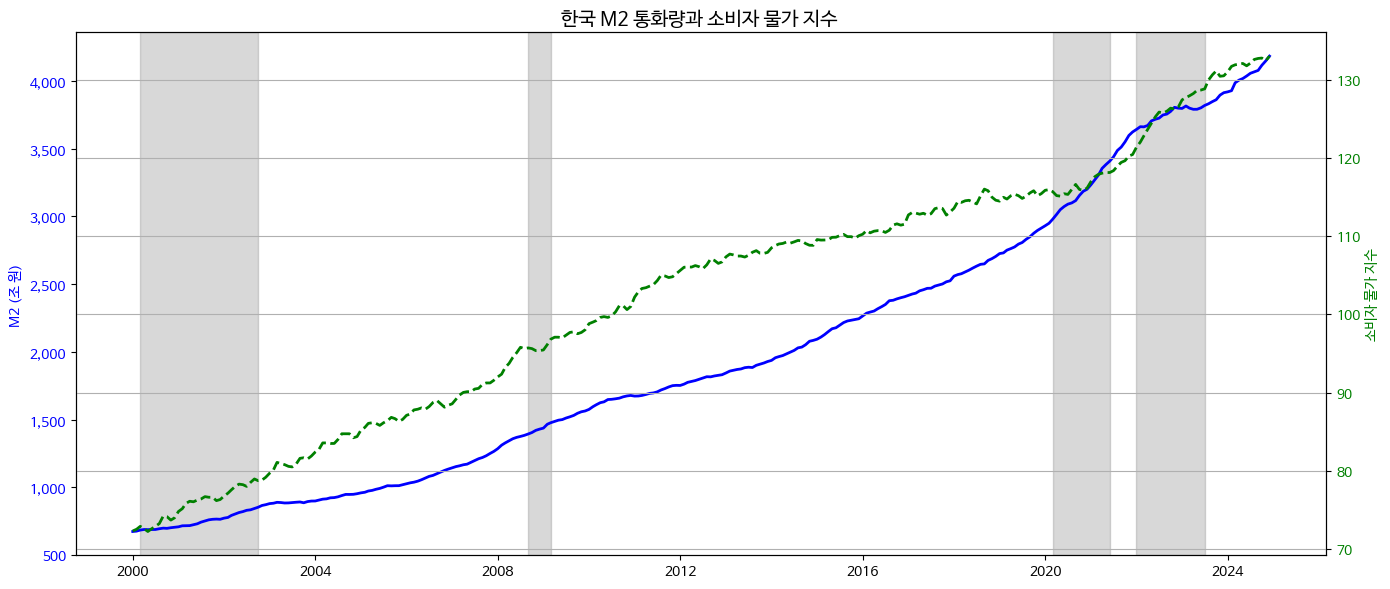

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 폰트 설정 (한국어 깨짐 방지)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# TIME 컬럼을 datetime으로 변환
df['TIME'] = pd.to_datetime(df['TIME'])

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(14, 6))

# 왼쪽 축: M2 (파란 선)
ax1.plot(df['TIME'], df['M2'], color='blue', linewidth=2, label='M2')
ax1.set_ylabel('M2 (조 원)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 오른쪽 축: 한국 소비자 물가지수 (초록 점선)
ax2 = ax1.twinx()
ax2.plot(df['TIME'], df['한국 소비자 물가지수'], color='green', linestyle='--', linewidth=2, label='CPI')
ax2.set_ylabel('소비자 물가 지수', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 이벤트 음영만 표시 (글자 X)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]
for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)



# 공통 설정
plt.title('한국 M2 통화량과 소비자 물가 지수 ', fontsize=14)
plt.grid(True)
fig.tight_layout()
plt.show()


|연도|이벤트|M2|CPI|
|--|---|---|---|
|2000-03 - 2002-10|닷컴버블|완만히 증가|거의 정체|
|2008-09 - 2009-03|글로벌 금융위기|한국은행 완화적 정책 -> 증가| 결기 침체로 물가 둔화|
|2020-03 - 2021-06|코로나 팬데믹|대규모 부양책, 유동성 급증 -> 증가|공급망 충격, 점진적 상승 -> 증가|
|2022-01 - 2023-07|자이언트 스텝|한국은행 금리 인상 -> 정체| 상승세 유지|

✅ **한국 M2와 소비자 물가 지수 전년 대비 증가율 추이**

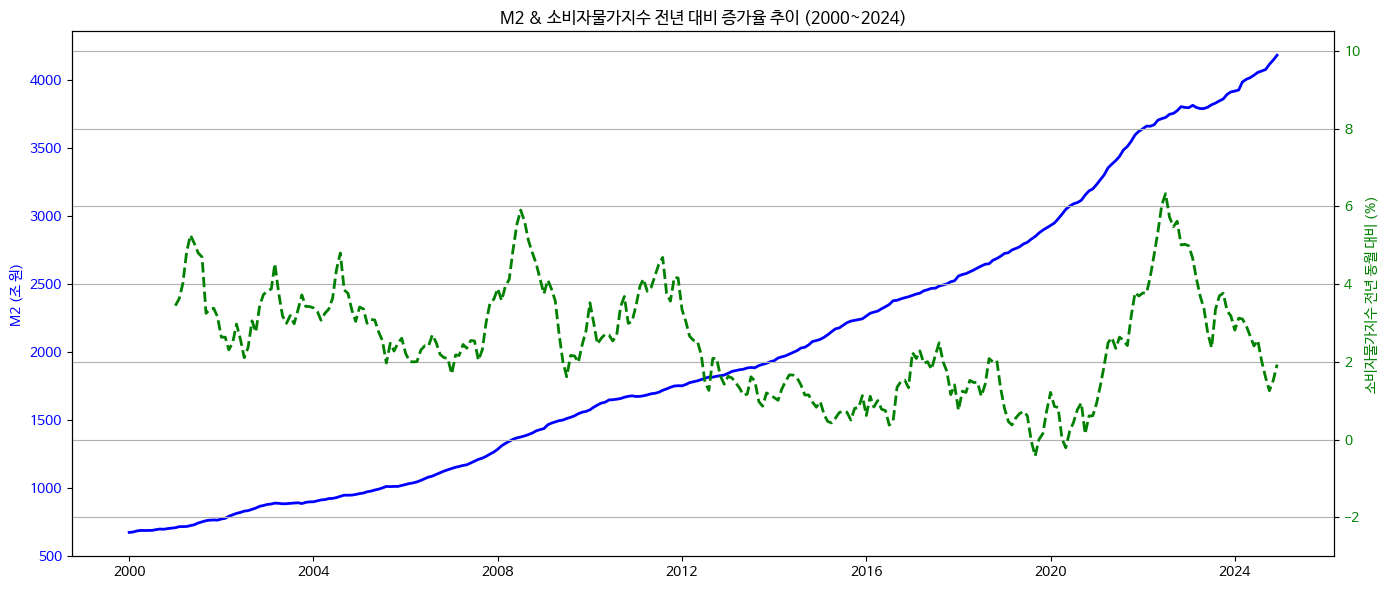

In [161]:
# 1. 날짜 형식 정리
df['DATE'] = pd.to_datetime(df['TIME'])
df = df.sort_values('DATE')

# 2. 전년 동월 대비 증가율 계산 (%)
df['M2_YoY'] = df['M2'].pct_change(periods=12) * 100
df['CPI_YoY'] = df['한국 소비자 물가지수'].pct_change(periods=12) * 100

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

# 왼쪽 축 - M2
ax1.plot(df['DATE'], df['M2'], color='blue', linewidth=2, label='M2')
ax1.set_ylabel('M2 (조 원)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 오른쪽 축 - CPI YoY
ax2 = ax1.twinx()
ax2.plot(df['DATE'], df['CPI_YoY'], color='green', linestyle='--', label='CPI YoY', linewidth=2)
ax2.set_ylabel('소비자물가지수 전년 동월 대비 (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# CPI Y축 범위 고정
ax2.set_ylim(-3.0, 10.5)

# 공통 설정
plt.title('M2 & 소비자물가지수 전년 대비 증가율 추이 (2000~2024)')
plt.grid(True)
fig.tight_layout()
plt.show()


📌 M2는 꾸준한 상승세: 2000년 이후 중단 없는 증가 → 통화 공급의 구조적 증가

📌 CPI 상승률은 등락 반복: 2~4% 중심으로 오르락내리락하다가, 2022년쯤 급등 후 다시 하락

❓2022년 급등했다가 하락한 이유는?

|시기|원인|
|--|--|
|2022년 CPI 급등|	우크라 전쟁, 원자재 급등, 환율 상승, 공급망 병목|
|2023~2024년 CPI 하락|	원자재 안정, 금리인상 효과, 기저효과|

#### 추론통계

✅ **힌극 M2와 소비자 물가지수 산점도**

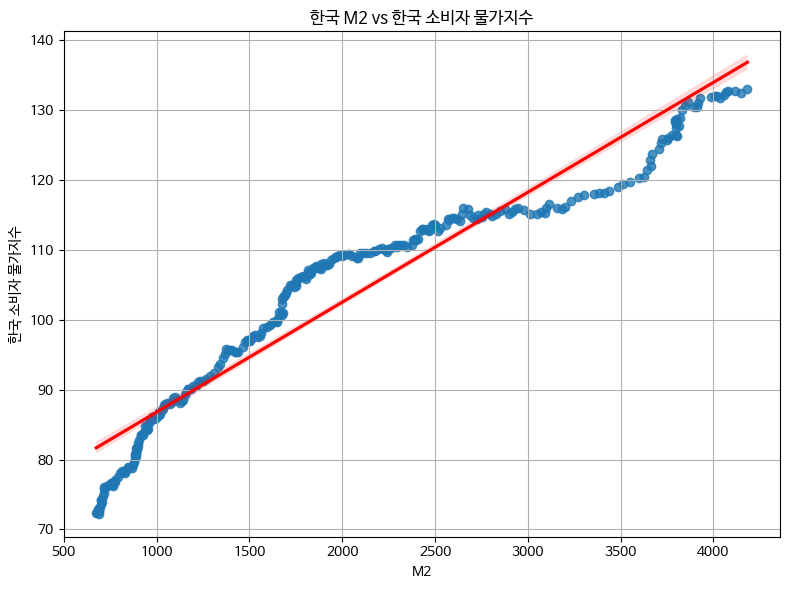

In [162]:
plt.figure(figsize=(8, 6))
sns.regplot(x="M2", y="한국 소비자 물가지수", data=df, line_kws={"color": "red"})
plt.title("한국 M2 vs 한국 소비자 물가지수")
plt.xlabel("M2")
plt.ylabel("한국 소비자 물가지수")
plt.grid(True)
plt.tight_layout()
plt.show()

귀무가설 (H₀): 한국 M2와 소비자물가지수 사이에는 상관관계가 없다.

대립가설 (H₁): 한국 M2가 증가할수록 소비자물가지수도 증가한다. (양의 상관관계)

In [163]:
import scipy.stats as stats

# 데이터 준비 (결측치 제거)
df_corr = df.dropna(subset=['M2', '한국 소비자 물가지수'])

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = stats.pearsonr(df_corr['M2'], df_corr['한국 소비자 물가지수'])

print(f"📌 Pearson 상관계수: {corr_coef:.4f}")
print(f"📌 p-value: {p_value:.4f}")

📌 Pearson 상관계수: 0.9620
📌 p-value: 0.0000


😊 결론 😊

r = 0.9620 : 강한 양의 상관관계

p = 0.0004 < 0.05 : 귀무가설 기각

→ 유의미한 양의 상관관계 존재

### M2 & 원/달러 환율

✅ **한국 M2와 원/달러 환율 시계열 그래프**

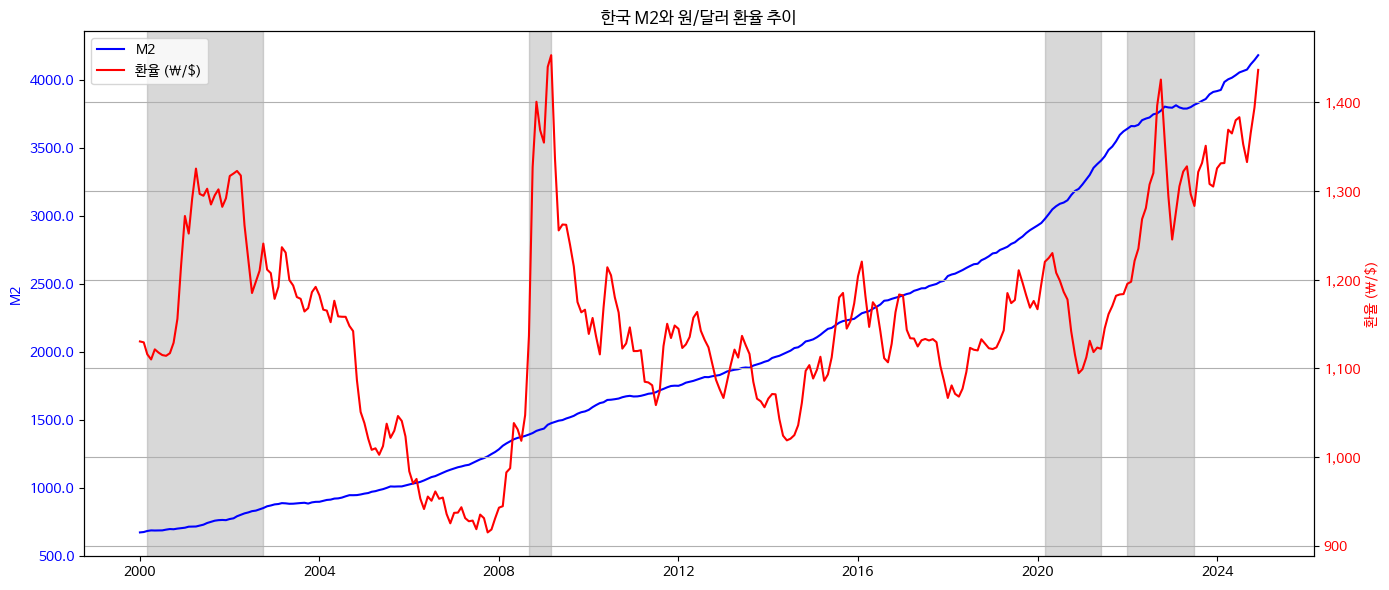

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 날짜 처리 (원본 df)
df["TIME"] = pd.to_datetime(df["TIME"])

# ▶ 시각화용 복사본 생성
df_plot = df.copy()

# ▶ 필요한 컬럼만 선택 및 정렬 (원본 df 건드리지 않음)
df_plot = df_plot[["TIME", "M2", "원/달러환율"]].sort_values("TIME")

# 시계열 시각화
plt.figure(figsize=(14, 6))

# ▶ 왼쪽 y축: M2
ax1 = plt.gca()
line1, = ax1.plot(df_plot["TIME"], df_plot["M2"], color='blue', label="M2")
ax1.set_ylabel("M2", color="blue")
ax1.tick_params(axis='y', labelcolor='blue')
# 증가율 소수 한 자리까지 표시
ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# ▶ 오른쪽 y축: 환율
ax2 = ax1.twinx()
line2, = ax2.plot(df_plot["TIME"], df_plot["원/달러환율"], color='red', label="환율 (₩/$)")
ax2.set_ylabel("환율 (₩/$)", color="red")
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 이벤트 음영만 표시 (글자 X)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]

for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# ▶ 범례 추가 (두 축의 선 통합)
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# 제목과 그리드
plt.title("한국 M2와 원/달러 환율 추이")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ **한국 M2 증가분과 원/달러 환율 시계열 그래프**

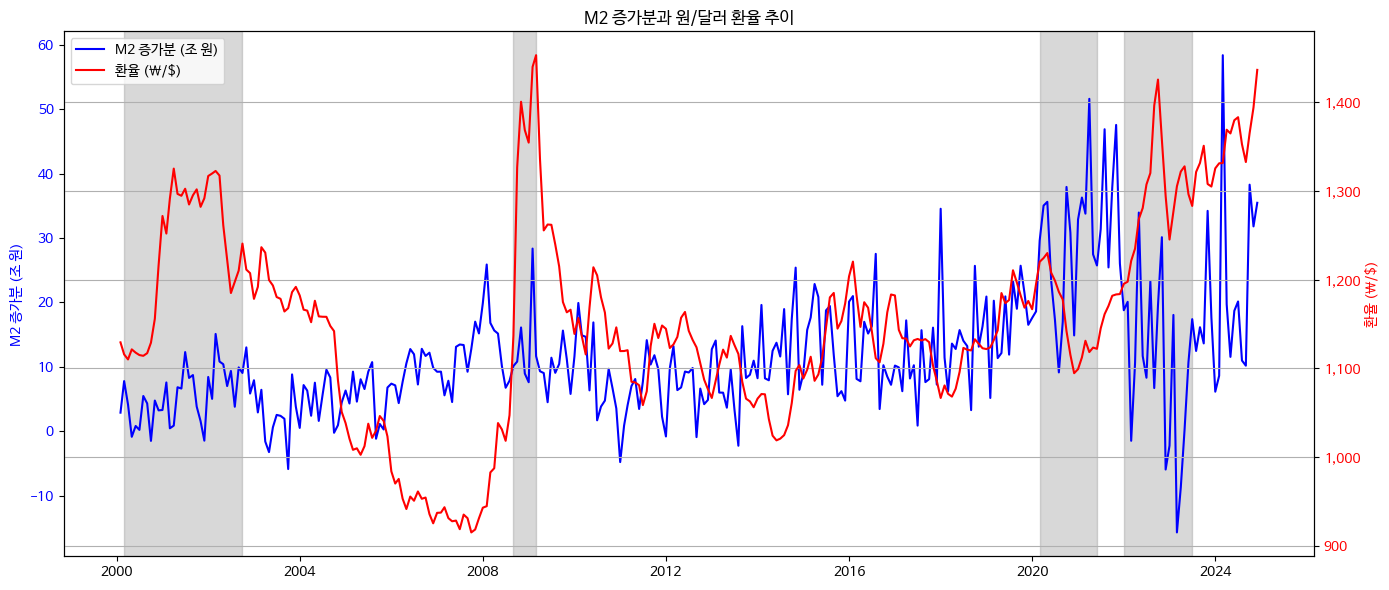

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 날짜 처리 (원본 df)
df["TIME"] = pd.to_datetime(df["TIME"], format="%Y-%m")

# 정렬 (원본 df)
df = df.sort_values("TIME")

# ▶ 원본 df 복사본 생성
df_plot = df.copy()

# ▶ M2 증가분 계산 (전월 대비 차이, 복사본에서만 적용)
df_plot['M2증가분'] = df_plot['M2'].diff()

# NaN 제거 (첫 행은 증가분 계산 때문에 NaN, 복사본에서만 제거)
df_plot = df_plot.dropna(subset=["M2증가분", "원/달러환율"])

# 시계열 시각화
plt.figure(figsize=(14, 6))

# ▶ 왼쪽 y축: M2 증가분
ax1 = plt.gca()
line1, = ax1.plot(df_plot["TIME"], df_plot["M2증가분"], color='blue', label="M2 증가분 (조 원)")
ax1.set_ylabel("M2 증가분 (조 원)", color="blue")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# ▶ 오른쪽 y축: 환율
ax2 = ax1.twinx()
line2, = ax2.plot(df_plot["TIME"], df_plot["원/달러환율"], color='red', label="환율 (₩/$)")
ax2.set_ylabel("환율 (₩/$)", color="red")
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 이벤트 음영만 표시 (글자 X)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]
for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# ▶ 범례 추가 (두 축의 선 통합)
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# 제목과 그리드
plt.title("M2 증가분과 원/달러 환율 추이")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ **한국 M2증가분과 원/달러 환율 상관관계**

In [169]:
# 데이터 준비 (결측치 제거)
df_corr = df_plot.dropna(subset=['M2증가분', '원/달러환율'])

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = stats.pearsonr(df_corr['M2증가분'], df_corr['원/달러환율'])

print(f"📌 Pearson 상관계수: {corr_coef:.4f}")
print(f"📌 p-value: {p_value:.4f}")

📌 Pearson 상관계수: 0.1036
📌 p-value: 0.0737


#### 추론통계

✅ **한국 M2와 원/달러 환율 산점도**

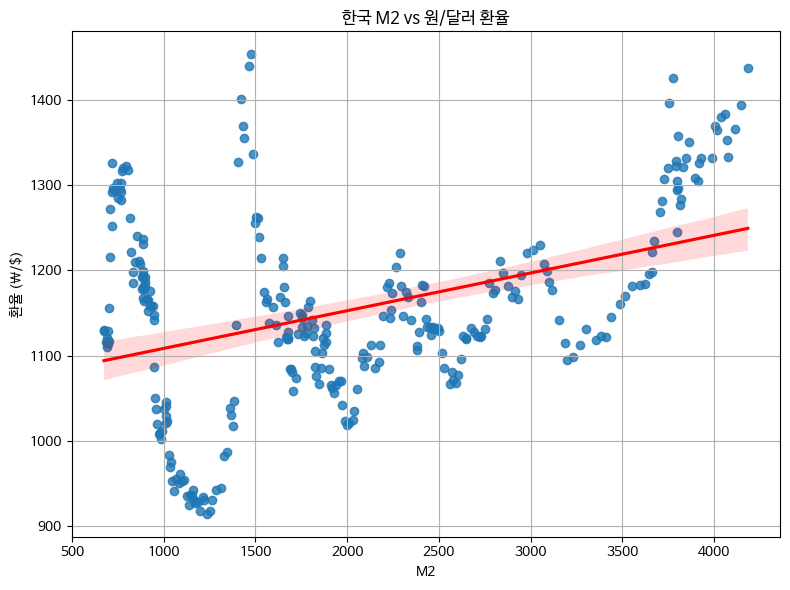

In [171]:
# 산점도 + 회귀선 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="M2", y="원/달러환율", data=df, line_kws={"color": "red"})
plt.title("한국 M2 vs 원/달러 환율")
plt.xlabel("M2")
plt.ylabel("환율 (₩/$)")
plt.grid(True)
plt.tight_layout()
plt.show()

귀무가설 (H₀): 한국 M2와 원/달러 환율 사이에는 상관관계가 없다.

대립가설 (H₁): 한국 M2와 원/달러 환율 사이에는 상관관계가 있다.

In [173]:
# 데이터 준비 (결측치 제거)
df_corr = df.dropna(subset=['M2', '원/달러환율'])

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = stats.pearsonr(df_corr['M2'], df_corr['원/달러환율'])

print(f"📌 Pearson 상관계수: {corr_coef:.4f}")
print(f"📌 p-value: {p_value:.4f}")

📌 Pearson 상관계수: 0.3950
📌 p-value: 0.0000


😊 결론 😊

r = 0.3950 : 중간 정도의 양의 상관관계

p = 0.0000 < 0.05 : 귀무가설 기각

→ 유의미한 양의 상관관계 존재

## 미국

**미국 M2 통화량과 인플레이션**

📌 경기 침체 -> 물가 하락

📌 경기 침체 -> 경기 부양책 실시 (해결책) M2 통화량 증가

In [175]:
df_m2us = pd.read_csv("/content/drive/MyDrive/DATATHON/USAM2.csv")

# TIME 컬럼을 datetime으로 변환
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')
df_m2us['TIME'] = pd.to_datetime(df_m2us['TIME'], errors='coerce')

# 월 단위로 통일 + 문자열 변환
df['TIME'] = df['TIME'].dt.to_period('M').astype(str)
df_m2us['TIME'] = df_m2us['TIME'].dt.to_period('M').astype(str)

df = pd.merge(df, df_m2us, on='TIME', how='left', suffixes=('', '_US'))




### M2 & 소비자 물가 지수

✅ **미국 M2와 소비자 물가 지수 시계열 그래프**

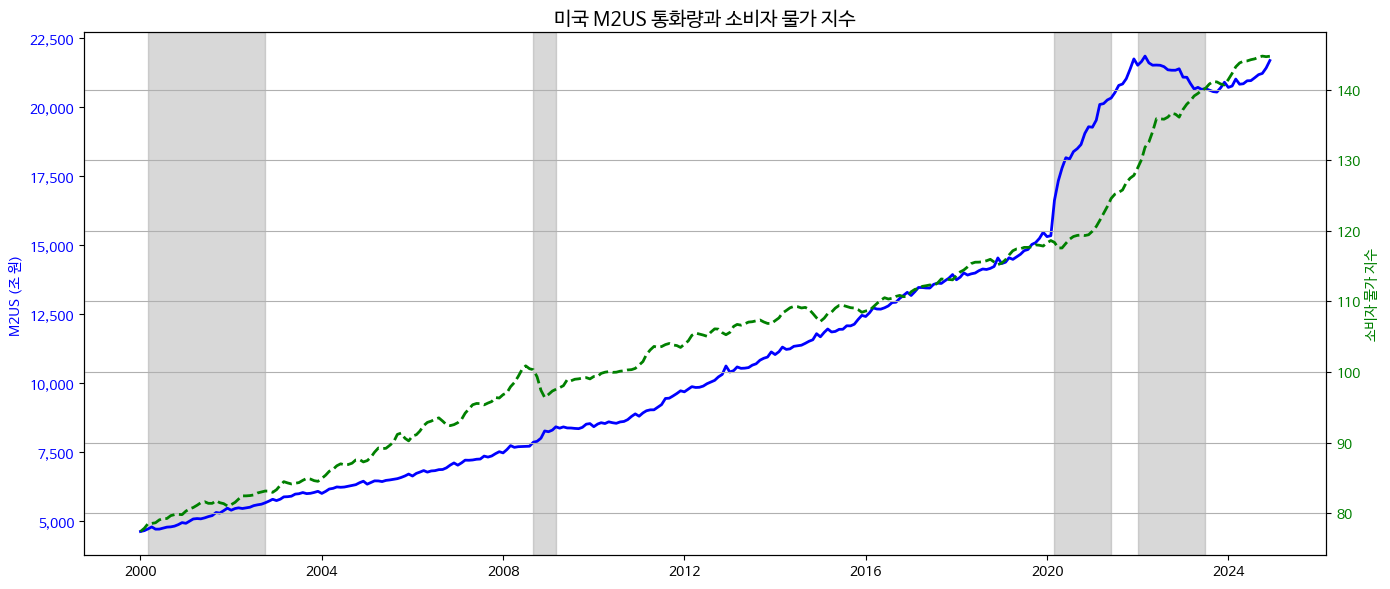

In [177]:
# 폰트 설정 (한국어 깨짐 방지)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# TIME 컬럼을 datetime으로 변환 (원본 df)
df['TIME'] = pd.to_datetime(df['TIME'])

# ▶ 시각화용 복사본 생성
df_plotus = df.copy()

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(14, 6))

# 왼쪽 축: M2US (파란 선)
ax1.plot(df_plotus['TIME'], df_plotus['M2US'], color='blue', linewidth=2, label='M2US')
ax1.set_ylabel('M2US (조 원)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 오른쪽 축: 미국 소비자 물가지수 (초록 점선)
ax2 = ax1.twinx()
ax2.plot(df_plotus['TIME'], df_plotus['미국 소비자 물가지수'], color='green', linestyle='--', linewidth=2, label='CPI')
ax2.set_ylabel('소비자 물가 지수', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 이벤트 음영만 표시 (글자 X)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]
for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# 공통 설정
plt.title('미국 M2US 통화량과 소비자 물가 지수', fontsize=14)
plt.grid(True)
fig.tight_layout()
plt.show()



|연도|이벤트|M2|CPI|
|--|---|---|---|
|2000-03 - 2002-10|닷컴버블|큰 영향 없음|큰 영향 없음|
|2008-09 - 2009-03|글로벌 금융위기|연준 양적완화 정책 -> 증가| 결기 침체로 물가 둔화|
|2020-03 - 2021-06|코로나 팬데믹|연준의 대규모 경기 부양 -> 폭발적 증가|시차를 두고 가파르게 상승|
|2022-01 - 2023-07|자이언트 스텝|정체|점진적 둔화|

#### 추론통계

✅ 미극 M2와 소비자 물가지수 산점도

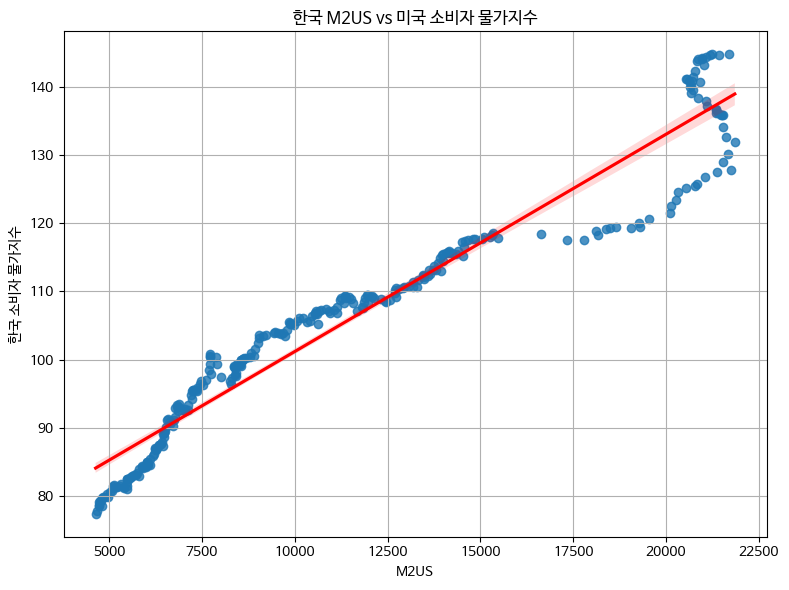

In [179]:
plt.figure(figsize=(8, 6))
sns.regplot(x="M2US", y="미국 소비자 물가지수", data=df, line_kws={"color": "red"})
plt.title("한국 M2US vs 미국 소비자 물가지수")
plt.xlabel("M2US")
plt.ylabel("한국 소비자 물가지수")
plt.grid(True)
plt.tight_layout()

귀무가설 (H₀): 미국 M2와 소비자물가지수 사이에는 상관관계가 없다.

대립가설 (H₁): 미국 M2가 증가할수록 소비자물가지수도 증가한다. (양의 상관관계)

In [181]:
# 데이터 준비 (결측치 제거)
df_corr = df.dropna(subset=['M2US', '미국 소비자 물가지수'])

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = stats.pearsonr(df_corr['M2US'], df_corr['미국 소비자 물가지수'])

print(f"📌 Pearson 상관계수: {corr_coef:.4f}")
print(f"📌 p-value: {p_value:.4f}")

📌 Pearson 상관계수: 0.9680
📌 p-value: 0.0000


😊 결론 😊

r = 0.9680 : 강한 양의 상관관계

p = 0.0000 < 0.05 : 귀무가설 기각

→ 유의미한 양의 상관관계 존재

### M2 & 원/달러 환율

✅ 미국 M2와 원/달러 환율 시계열 그래프

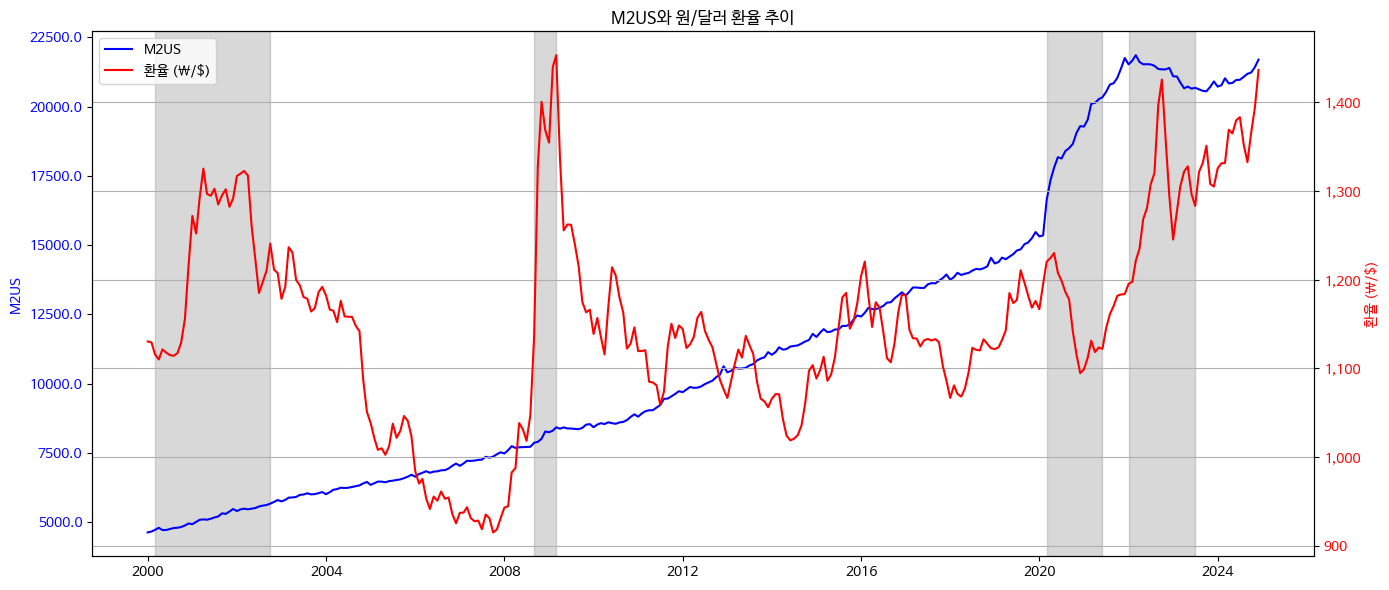

In [182]:
# 폰트 설정 (한국어 깨짐 방지)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 날짜 처리 (원본 df)
df["TIME"] = pd.to_datetime(df["TIME"])

# ▶ 시각화용 복사본 생성
df_plotus = df.copy()

# ▶ 시각화용 데이터 선택 및 정렬 (원본 df 건드리지 않음)
df_plotus = df_plotus[["TIME", "M2US", "원/달러환율"]].sort_values("TIME")

# 시계열 시각화
plt.figure(figsize=(14, 6))

# ▶ 왼쪽 y축: M2US
ax1 = plt.gca()
line1, = ax1.plot(df_plotus["TIME"], df_plotus["M2US"], color='blue', label="M2US")
ax1.set_ylabel("M2US", color="blue")
ax1.tick_params(axis='y', labelcolor='blue')
# 값 소수 한 자리까지 표시
ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# ▶ 오른쪽 y축: 환율
ax2 = ax1.twinx()
line2, = ax2.plot(df_plotus["TIME"], df_plotus["원/달러환율"], color='red', label="환율 (₩/$)")
ax2.set_ylabel("환율 (₩/$)", color="red")
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 이벤트 음영만 표시 (글자 X)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]

for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# ▶ 범례 추가 (두 축의 선 통합)
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# 제목과 그리드
plt.title("M2US와 원/달러 환율 추이")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ 미국 M2 증가분과 원/달러 환율 시계열 그래프

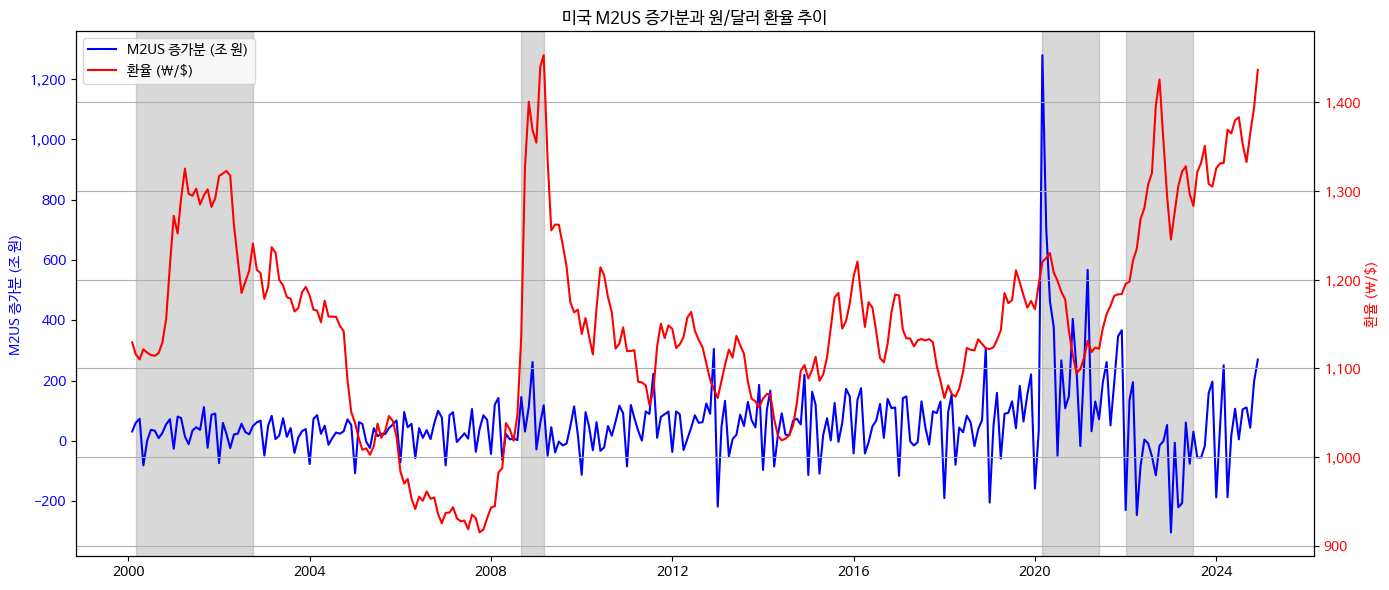

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 날짜 처리 (원본 df)
df["TIME"] = pd.to_datetime(df["TIME"], format="%Y-%m")

# 정렬 (원본 df)
df = df.sort_values("TIME")

# ▶ 복사본 생성 (원본 안전 보존)
df_plotus = df.copy()

# ▶ M2US 증가분 계산 (전월 대비 차이, 복사본에서만 적용)
df_plotus['M2US증가분'] = df_plotus['M2US'].diff()

# NaN 제거 (첫 행은 증가분 계산 때문에 NaN, 복사본에서만 제거)
df_plotus = df_plotus.dropna(subset=["M2US증가분", "원/달러환율"])

# 시계열 시각화
plt.figure(figsize=(14, 6))

# ▶ 왼쪽 y축: M2US 증가분
ax1 = plt.gca()
line1, = ax1.plot(df_plotus["TIME"], df_plotus["M2US증가분"], color='blue', label="M2US 증가분 (조 원)")
ax1.set_ylabel("M2US 증가분 (조 원)", color="blue")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# ▶ 오른쪽 y축: 환율
ax2 = ax1.twinx()
line2, = ax2.plot(df_plotus["TIME"], df_plotus["원/달러환율"], color='red', label="환율 (₩/$)")
ax2.set_ylabel("환율 (₩/$)", color="red")
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 이벤트 음영만 표시 (글자 X)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]
for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# ▶ 범례 추가 (두 축의 선 통합)
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# 제목과 그리드
plt.title("미국 M2US 증가분과 원/달러 환율 추이")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ 미국 M2증가분과 원/달러 환율 상관관계

In [186]:
# 데이터 준비 (결측치 제거)
df_corr = df_plotus.dropna(subset=['M2US증가분', '원/달러환율'])

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = stats.pearsonr(df_corr['M2US증가분'], df_corr['원/달러환율'])

print(f"📌 Pearson 상관계수: {corr_coef:.4f}")
print(f"📌 p-value: {p_value:.4f}")

📌 Pearson 상관계수: 0.0108
📌 p-value: 0.8524


#### 추론통계

✅ 미국 M2와 원/달러 환율 산점도

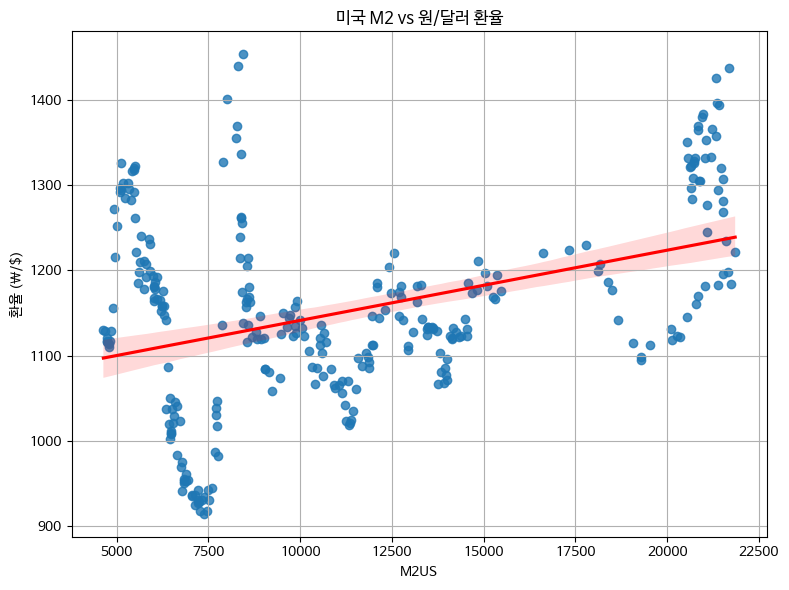

In [187]:
# 산점도 + 회귀선 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="M2US", y="원/달러환율", data=df, line_kws={"color": "red"})
plt.title("미국 M2 vs 원/달러 환율")
plt.xlabel("M2US")
plt.ylabel("환율 (₩/$)")
plt.grid(True)
plt.tight_layout()
plt.show()

귀무가설 (H₀): 미국 M2와 원/달러 환율 사이에는 상관관계가 없다.

대립가설 (H₁): 미국 M2와 원/달러 환율 사이에는 상관관계가 있다.

In [188]:
# 데이터 준비 (결측치 제거)
df_corr = df.dropna(subset=['M2US', '원/달러환율'])

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = stats.pearsonr(df_corr['M2US'], df_corr['원/달러환율'])

print(f"📌 Pearson 상관계수: {corr_coef:.4f}")
print(f"📌 p-value: {p_value:.4f}")

📌 Pearson 상관계수: 0.3856
📌 p-value: 0.0000


😊 결론 😊

r = 0.3859 : 중간 정도의 양의 상관관계

p = 0.0000 < 0.05 : 귀무가설 기각

→ 유의미한 양의 상관관계 존재

## 베네수엘라 하이퍼인플레이션

❓하이퍼인플레이션 : 물가가 아주 짧은 시간 안에 폭발적으로 오르는 현상 -> 일반적으로 월간 물가상승률이 50% 이상이면 하이퍼인플레이션으로 봄

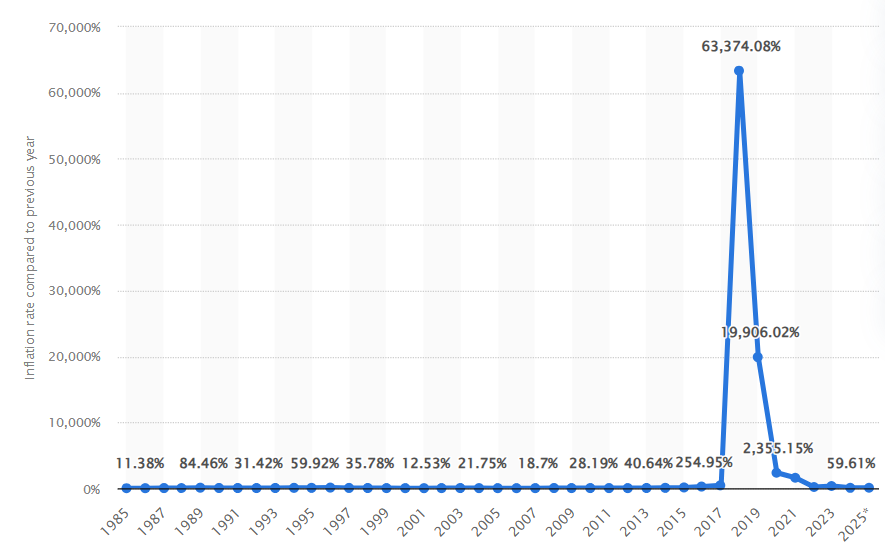

**베네수엘라 m2통화량**

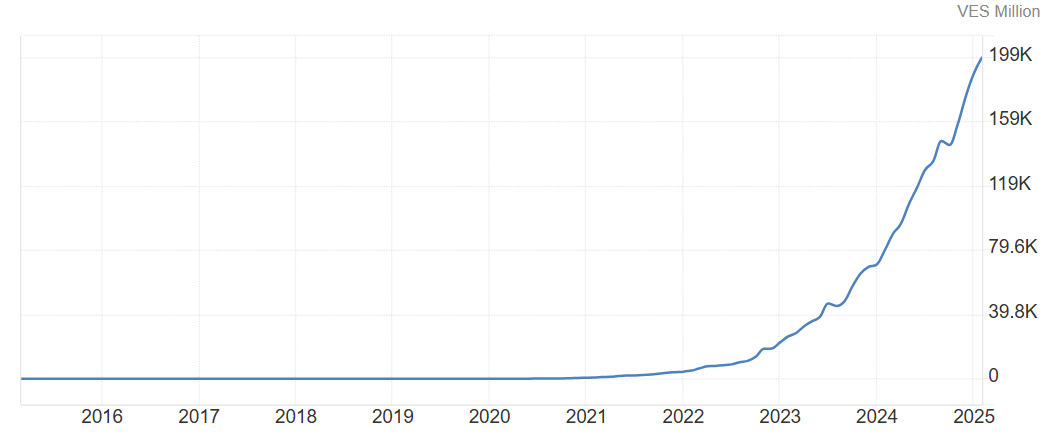

<베네수엘라의 하이퍼인플레이션 원인>
- 과도한 화폐 발행
- 재정 적자와 정부 신뢰의 붕괴
- 국제적 고립 또는 제재
- 정치적 불안정과 부정부패
- 무역수지 악화와 외환 부족
- 가격-임금 악순환

📌"정부의 재정 운용 실패 + 통화 남발 + 신뢰 붕괴 + 정치·경제 불안정"

|시기	|주요 현상|
|----|------|
|2014~2016년|	고물가 시작, 경제 악화 신호|
|2017~2018년|	하이퍼인플레이션 본격화 (2018년 연간 인플레이션율: 130,000% 이상)|
|2019~2021년	|화폐개혁 실시 (볼리바르 강제 절하), 여전히 극심한 인플레 지속|
|2022~2024년	|진정세 보이나 여전히 높은 물가상승률 (수십~수백 % 수준)|

💸 결과: 국민들의 삶에 미친 영향

|항목|	변화|
|---|---|
|화폐가치	|수백만 %, 수십억 % 폭락|
|현금사용	|무의미해짐 → 암호화폐 사용 확대, 물물교환|
|실질임금	|폭락 → 식료품조차 구매 어려움|
|탈출	|600만 명 이상 국외 이주 (주로 콜롬비아, 브라질 등으로)|

🔥우리나라는 어떻게 해야하는가?🔥

- 재정건전성 유지

- 중앙은행의 독립성과 통화정책 신뢰 확보

- 정책의 일관성과 신뢰성 유지

- 외환보유액과 대외신뢰 방어

- 사회적 대타협과 정치 안정성 확보

# 개인 - 인플레이션율

❓ 인플레이션율 : 전년 같은 기간 대비 물가 수준이 얼마나 상승했는지를 백분율로 나타낸 지표

## 한국

### 인플레이션율 & 원/달러 환율

✅ 한국 인플레이션율과 원/달러 환율 시계열 그래프

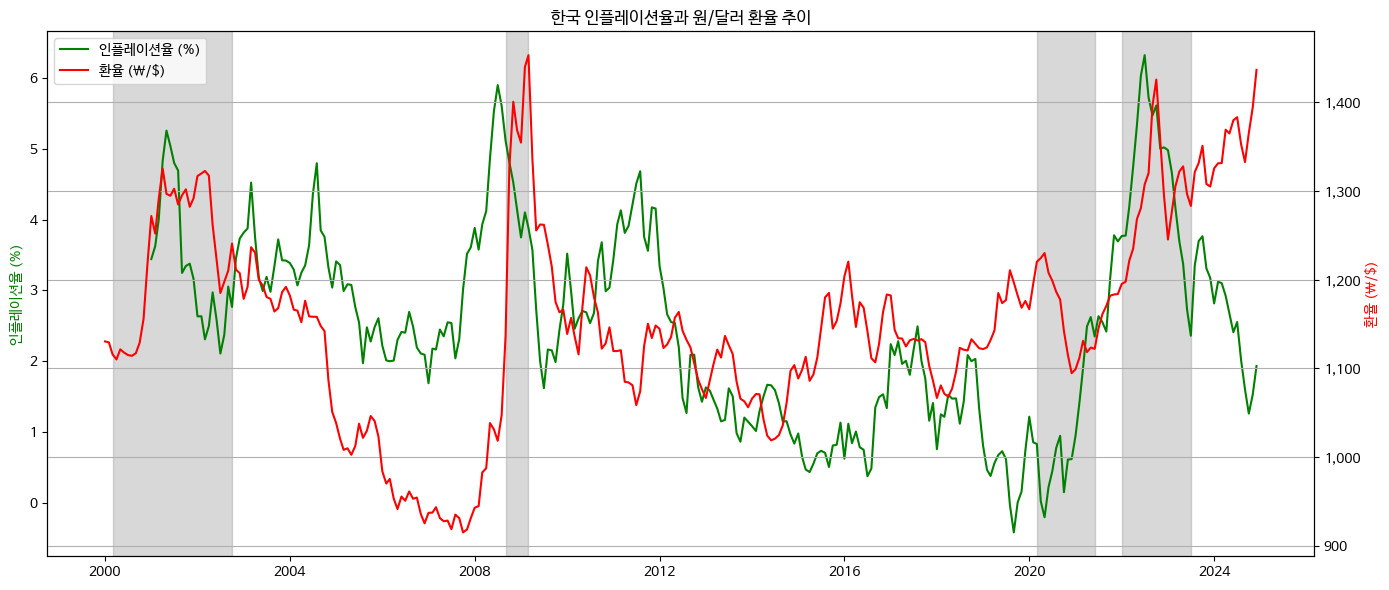

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 날짜 변환 (원본 df 유지)
df['TIME'] = pd.to_datetime(df['TIME'])

#  시각화용 복사본 생성
df_plot = df.copy()

# 필요한 변수만 선택 및 정렬 (복사본에서만)
df_plot = df_plot[["TIME", "한국 소비자 물가지수", "원/달러환율"]].sort_values("TIME").reset_index(drop=True)

# 인플레이션율 계산 (전년 동월 대비)
df_plot["인플레이션율"] = df_plot["한국 소비자 물가지수"].pct_change(periods=12) * 100

# 시계열 시각화: 범례 포함
plt.figure(figsize=(14, 6))

# 왼쪽 축: 인플레이션율
ax1 = plt.gca()
line1, = ax1.plot(df_plot["TIME"], df_plot["인플레이션율"], label="인플레이션율 (%)", color="GREEN")
ax1.set_ylabel("인플레이션율 (%)", color="GREEN")
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 오른쪽 축: 환율
ax2 = ax1.twinx()
line2, = ax2.plot(df_plot["TIME"], df_plot["원/달러환율"], label="환율 (₩/$)", color="RED")
ax2.set_ylabel("환율 (₩/$)", color="RED")
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 이벤트 음영만 표시 (글자 제거)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]

for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# 범례 추가
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# 제목 및 기타
plt.title("한국 인플레이션율과 원/달러 환율 추이")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 추론통계

✅ 한국 인플레이션율과 원/달러 환율 산점도

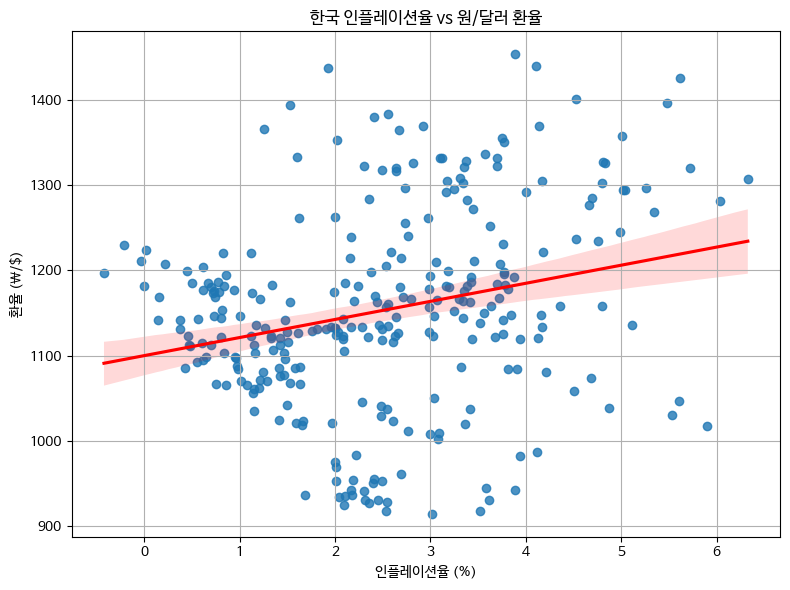

In [203]:
# 산점도 + 회귀선 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="인플레이션율", y="원/달러환율", data=df_plot, line_kws={"color": "red"})
plt.title("한국 인플레이션율 vs 원/달러 환율")
plt.xlabel("인플레이션율 (%)")
plt.ylabel("환율 (₩/$)")
plt.grid(True)
plt.tight_layout()
plt.show()

귀무가설 (H₀): 한국 인플레이션과 환율 사이에는 상관관계가 없다.

대립가설 (H₁): 한국 인플레이션이 올라가면 환율도 상승한다.
→ 즉, 양의 상관관계가 있다.

In [205]:
# NaN 제거
df_corr = df_plot.dropna(subset=["인플레이션율", "원/달러환율"])

# 변수 추출
x = df_corr["인플레이션율"]
y = df_corr["원/달러환율"]

# 피어슨 상관계수 및 p값 계산
r, p_two_tailed = stats.pearsonr(x, y)
p_one_tailed = p_two_tailed / 2

print(f"📌 피어슨 상관계수: r = {r:.4f}")
print(f"📌 단측검정 p-value: {p_one_tailed:.4f}")


📌 피어슨 상관계수: r = 0.2517
📌 단측검정 p-value: 0.0000


😊 결론 😊

r = 0.2517 : 약한 양의 선형관계

p-value = 0.0000 < 0.05 : 귀무가설을 기각

⟶ 통계적으로 유의미한 양의 상관관계가 존재

## 미국

### 인플레이션율 & 원/달러 환율

✅ 미국 인플레이션율과 원/달러 환율 시계열 그래프

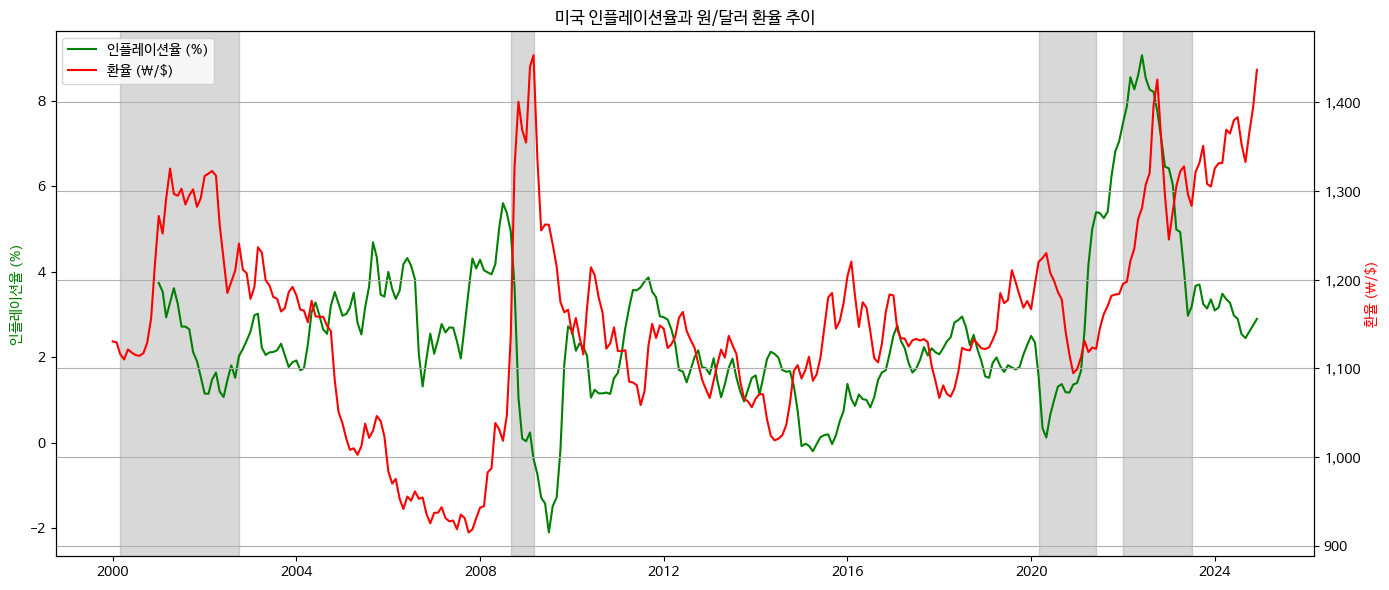

In [208]:
# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 날짜 변환 (원본 df 유지)
df['TIME'] = pd.to_datetime(df['TIME'])

#  시각화용 복사본 생성
df_plot = df.copy()

# 필요한 변수만 선택 및 정렬 (복사본에서만)
df_plot = df_plot[["TIME", "미국 소비자 물가지수", "원/달러환율"]].sort_values("TIME").reset_index(drop=True)

# 인플레이션율 계산 (전년 동월 대비)
df_plot["인플레이션율"] = df_plot["미국 소비자 물가지수"].pct_change(periods=12) * 100

# 시계열 시각화: 범례 포함
plt.figure(figsize=(14, 6))

# 왼쪽 축: 인플레이션율
ax1 = plt.gca()
line1, = ax1.plot(df_plot["TIME"], df_plot["인플레이션율"], label="인플레이션율 (%)", color="GREEN")
ax1.set_ylabel("인플레이션율 (%)", color="GREEN")
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 오른쪽 축: 환율
ax2 = ax1.twinx()
line2, = ax2.plot(df_plot["TIME"], df_plot["원/달러환율"], label="환율 (₩/$)", color="RED")
ax2.set_ylabel("환율 (₩/$)", color="RED")
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 이벤트 음영만 표시 (글자 제거)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]

for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# 범례 추가
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# 제목 및 기타
plt.title("미국 인플레이션율과 원/달러 환율 추이")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 추론통계

✅ 미국 인플레이션율과 원/달러 환율 산점도

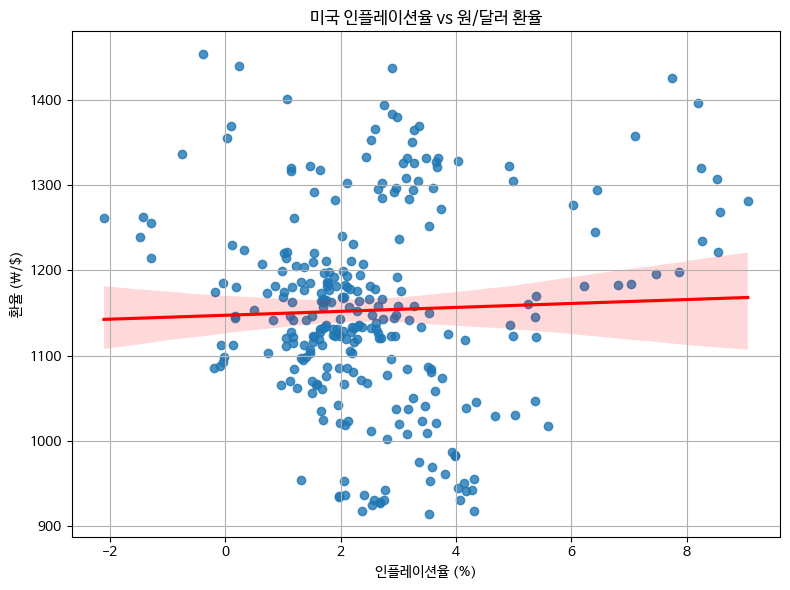

In [210]:
# 산점도 + 회귀선 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="인플레이션율", y="원/달러환율", data=df_plot, line_kws={"color": "red"})
plt.title("미국 인플레이션율 vs 원/달러 환율")
plt.xlabel("인플레이션율 (%)")
plt.ylabel("환율 (₩/$)")
plt.grid(True)
plt.tight_layout()
plt.show()

귀무가설 (H₀): 미국 인플레이션과 환율 사이에는 상관관계가 없다.

대립가설 (H₁): 미국 인플레이션이 올라가면 환율도 상승한다.
→ 즉, 양의 상관관계가 있다.

In [211]:
# NaN 제거
df_corr = df_plot.dropna(subset=["인플레이션율", "원/달러환율"])

# 변수 추출
x = df_corr["인플레이션율"]
y = df_corr["원/달러환율"]

# 피어슨 상관계수 및 p값 계산
r, p_two_tailed = stats.pearsonr(x, y)
p_one_tailed = p_two_tailed / 2

print(f"📌 피어슨 상관계수: r = {r:.4f}")
print(f"📌 단측검정 p-value: {p_one_tailed:.4f}")

📌 피어슨 상관계수: r = 0.0358
📌 단측검정 p-value: 0.2725


😊 결론 😊

r = 0.0358 : 약한 양의 선형관계

p-value = 0.2725 : 귀무가설을 채택

⟶ 통계적으로 유의미한 양의 상관관계가 존재하지 않

## 한미 인플레이션 격차

### 한미 인플레이션 격차가 클수록 환율은 상승한다.

한국 인플레이션 > 미국 인플레이션 -> 원화 가치 약세 -> 환율 상승

✅ 한미 인플레이션 격차와 원/달러 환율 시계열 그래프

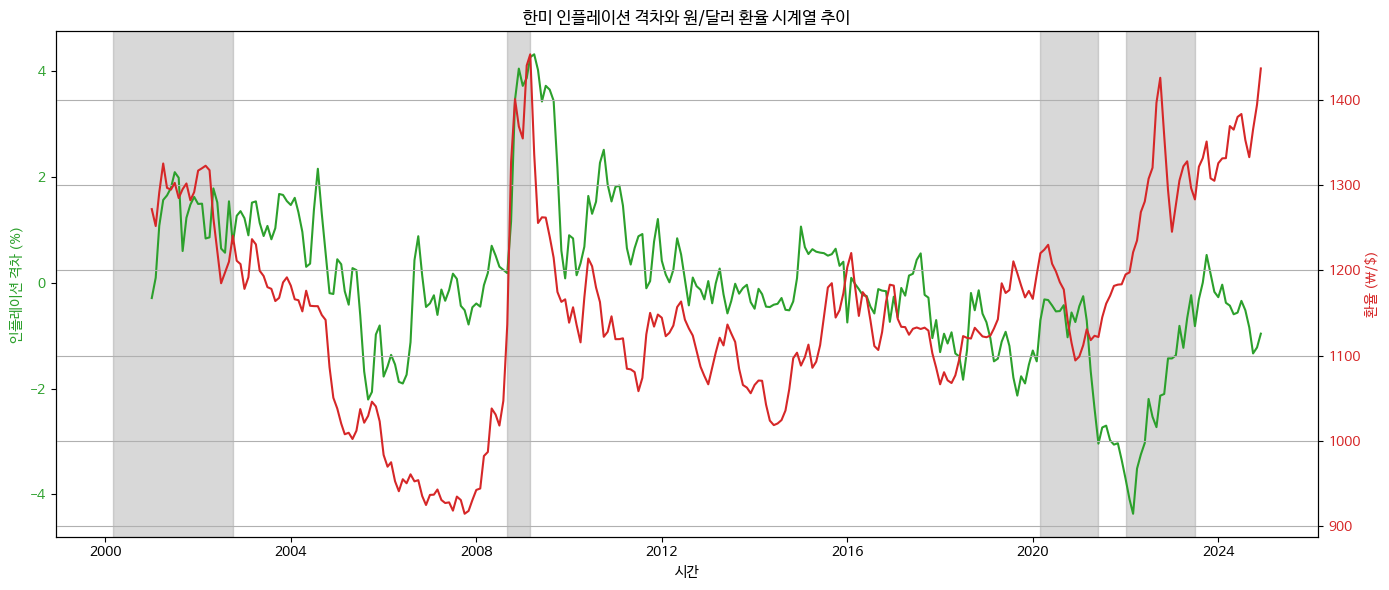

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 날짜 처리 (원본 df 유지)
df["TIME"] = pd.to_datetime(df["TIME"])

# ▶ 시각화용 복사본 생성
df_plotgap = df.copy()

# 인플레이션율 계산 (복사본에서만)
df_plotgap["한국 인플레이션율"] = df_plotgap["한국 소비자 물가지수"].pct_change(periods=12) * 100
df_plotgap["미국 인플레이션율"] = df_plotgap["미국 소비자 물가지수"].pct_change(periods=12) * 100

# 인플레이션 격차 계산
df_plotgap["인플레이션 격차"] = df_plotgap["한국 인플레이션율"] - df_plotgap["미국 인플레이션율"]

# 분석용 데이터프레임 (필요 컬럼만 선택, NaN 제거)
df_gap = df_plotgap[["TIME", "인플레이션 격차", "원/달러환율"]].dropna()

# 시계열 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

# 왼쪽 y축: 인플레이션 격차
ax1.set_xlabel("시간")
ax1.set_ylabel("인플레이션 격차 (%)", color="tab:green")
ax1.plot(df_gap["TIME"], df_gap["인플레이션 격차"], color="tab:green", label="인플레이션 격차")
ax1.tick_params(axis="y", labelcolor="tab:green")

# 오른쪽 y축: 환율
ax2 = ax1.twinx()
ax2.set_ylabel("환율 (₩/$)", color="tab:red")
ax2.plot(df_gap["TIME"], df_gap["원/달러환율"], color="tab:red", label="환율")
ax2.tick_params(axis="y", labelcolor="tab:red")

# 이벤트 음영만 표시 (글자 제거)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]

for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# 제목 및 기타
plt.title("한미 인플레이션 격차와 원/달러 환율 시계열 추이")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 추론통계

✅ 한미 인플레이션 차이와 원/달러 환율 산점도

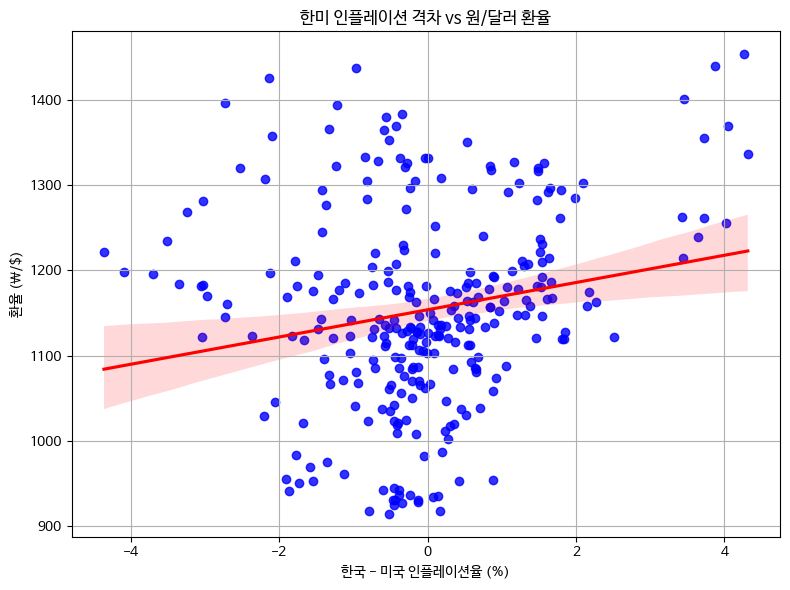

📊 한미 인플레이션 격차 vs 환율 상관계수: 0.197


In [217]:
# 폰트 설정 (마이너스 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# 날짜 처리 (원본 df 유지)
df["TIME"] = pd.to_datetime(df["TIME"])

# ▶ 시각화 및 분석용 복사본 생성
df_plotgap = df.copy()

# 인플레이션율 계산 (복사본에서만)
df_plotgap["한국 인플레이션율"] = df_plotgap["한국 소비자 물가지수"].pct_change(periods=12) * 100
df_plotgap["미국 인플레이션율"] = df_plotgap["미국 소비자 물가지수"].pct_change(periods=12) * 100

# 인플레이션 격차 계산 (한국 - 미국)
df_plotgap["인플레이션 격차"] = df_plotgap["한국 인플레이션율"] - df_plotgap["미국 인플레이션율"]

# 분석용 데이터프레임 (필요 컬럼만, NaN 제거)
df_gap = df_plotgap[["TIME", "인플레이션 격차", "원/달러환율"]].dropna()

# 산점도 + 회귀선 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="인플레이션 격차", y="원/달러환율", data=df_gap, color="blue", line_kws={"color": "red"})
plt.title("한미 인플레이션 격차 vs 원/달러 환율")
plt.xlabel("한국 - 미국 인플레이션율 (%)")
plt.ylabel("환율 (₩/$)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 상관계수 계산
correlation = df_gap["인플레이션 격차"].corr(df_gap["원/달러환율"])
print(f"📊 한미 인플레이션 격차 vs 환율 상관계수: {correlation:.3f}")


귀무가설 H₀: 인플레이션 격차와 환율은 무상관 (ρ = 0)

대립가설 H₁: 인플레이션 격차가 클수록 환율이 높다 (ρ > 0)
→ 단측검정으로 양의 상관관계 유무 판단

In [215]:
# NaN 제거
df_corr = df_plotgap.dropna(subset=["인플레이션 격차", "원/달러환율"])

# 변수 추출
x = df_corr["인플레이션 격차"]
y = df_corr["원/달러환율"]

# 피어슨 상관계수 및 p값 계산 (단측: 양의 상관관계 검정)
r, p_two_tailed = stats.pearsonr(x, y)
p_one_tailed = p_two_tailed / 2

print(f"📌 피어슨 상관계수: r = {r:.4f}")
print(f"📌 단측검정 p-value: {p_one_tailed:.4f}")


📌 피어슨 상관계수: r = 0.1970
📌 단측검정 p-value: 0.0004


😊 결론 😊

r = 0.1970 :  약한 양의 상관관계

p = 0.0004 < 0.05 : 귀무가설 기각

→ 유의미한 양의 상관관계 존재


# 정부 - GDP

- 명목 GDP : 해당 연도의 시장 가격 기준으로 측정된 GDP - 실제 가격 그대로

- 실질 GDP : 기준 연도의 고정 가격 기준으로 측정된 GDP - 명목 GDP / GDP 디플레이터 * 100

즉, 실질 GDP는 물가 상승을 제거한 순수한 생산량 증가분만을 나타내는 지표

❓ 왜 실질 GDP로 보았을까?
- 물가가 오르면 GDP도 커짐 (실제 생산이 늘지 않아도) -> 실제 경제 성장력을 제대로 반영 못함

- 실질 GDP는 성장 그 자체만 평가 -> "실제로 얼마나 더 많이 만들었나?" 측정 -> 경제활력, 생산력, 산업의 확장성을 판단

### 실질 GDP 성장률 & 원/달러 환율

✅ 실질 GDP 성장률과 원/달러 환율 시계열 그래프

<ipython-input-218-51eccebd1e73>:18: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_plotgdp["실질GDP성장률"] = df_plotgdp["실질GDP"].pct_change(periods=12) * 100


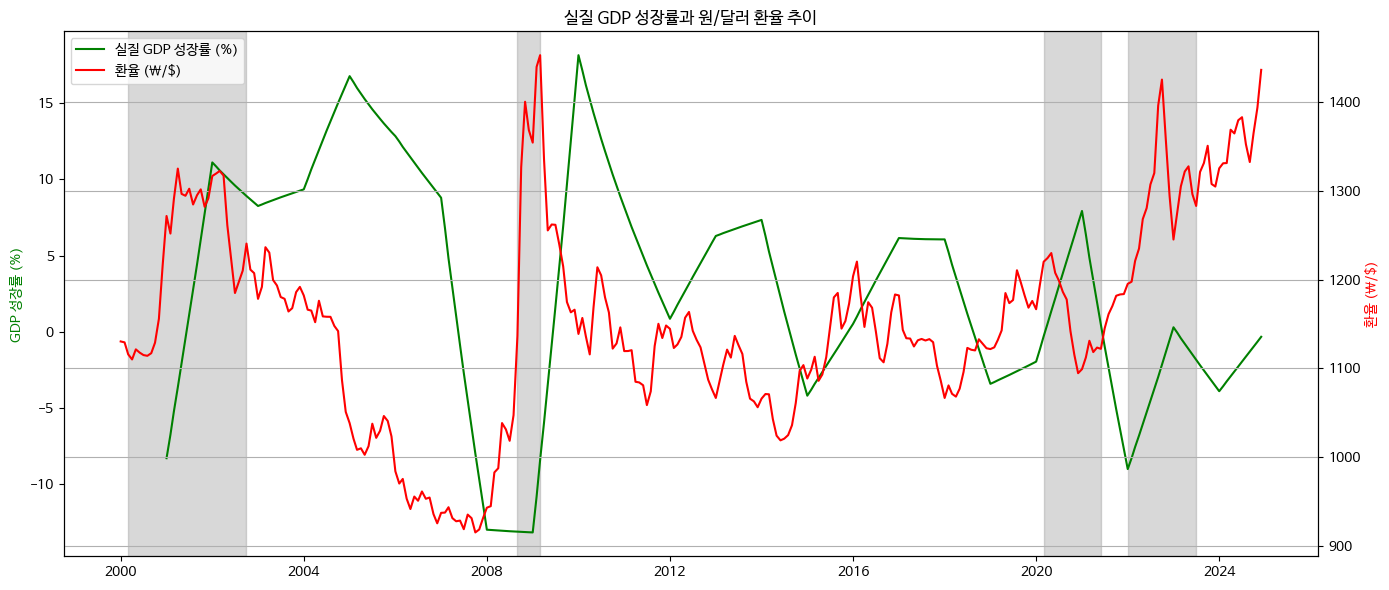

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 날짜 처리 (원본 df 유지)
df["TIME"] = pd.to_datetime(df["TIME"])

# ▶ 분석 및 시각화용 복사본 생성
df_plotgdp = df.copy()

# 실질 GDP 계산 (복사본에서만)
df_plotgdp["실질GDP"] = df_plotgdp["한국 GDP"] / df_plotgdp["한국 GDP 디플레이터"] * 100

# 실질 GDP 성장률 계산 (전년 동기 대비)
df_plotgdp["실질GDP성장률"] = df_plotgdp["실질GDP"].pct_change(periods=12) * 100

# 한국 GDP의 마지막 유효 시점 기준으로 성장률 유효 시점 제한
last_gdp_date = df_plotgdp[df_plotgdp["한국 GDP"].notna()]["TIME"].max()
gdp_growth_cutoff = last_gdp_date - pd.DateOffset(months=12)


# 시계열 시각화
plt.figure(figsize=(14, 6))

# ▶ 왼쪽 y축: GDP 성장률
ax1 = plt.gca()
line1, = ax1.plot(df_plotgdp["TIME"], df_plotgdp["실질GDP성장률"], color='green', label="실질 GDP 성장률 (%)")
ax1.set_ylabel("GDP 성장률 (%)", color="green")

# ▶ 오른쪽 y축: 환율
ax2 = ax1.twinx()
line2, = ax2.plot(df_plotgdp["TIME"], df_plotgdp["원/달러환율"], color='red', label="환율 (₩/$)")
ax2.set_ylabel("환율 (₩/$)", color="red")

# 이벤트 음영 표시 (글자 X)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]

for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# ▶ 범례 추가 (두 축의 선 통합)
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# 제목과 그리드
plt.title("실질 GDP 성장률과 원/달러 환율 추이")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 추론통계

✅ 실질 GDP 성장률과 원/달러 환율 산점도

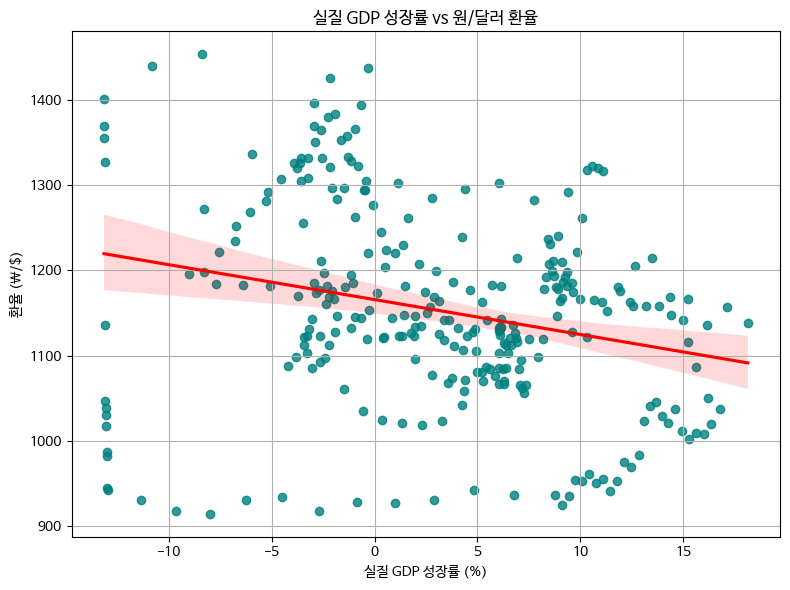

실질 GDP 성장률과 환율 상관계수: -0.253


In [220]:
# NaN 제거 후 분석용 데이터프레임
df_gdp = df_plotgdp[["TIME", "실질GDP성장률", "원/달러환율"]].dropna()

# 산점도 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="실질GDP성장률", y="원/달러환율", data=df_gdp, color="teal", line_kws={"color": "red"})
plt.title("실질 GDP 성장률 vs 원/달러 환율")
plt.xlabel("실질 GDP 성장률 (%)")
plt.ylabel("환율 (₩/$)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 상관계수 확인
correlation = df_gdp["실질GDP성장률"].corr(df_gdp["원/달러환율"])
print(f"실질 GDP 성장률과 환율 상관계수: {correlation:.3f}")


📌“실질 경제가 성장할수록 환율이 안정되거나 낮아진다”


실질 경제성장이 강할수록 외국인 투자자들이 한국 시장에 대해 긍정적인 전망을 가져 원화 수요가 늘어나고, **환율은 하락**


특히 성장률이 마이너스에 가까운 구간에서는 환율이 상대적으로 높게 분포하고 있음 -> 경기 침체와 원화 약세가 동반되는 현상

(즉, 경제에 대한 신뢰가 올라가며 원화 가치 상승)

귀무가설 (H₀): 실질 GDP 성장률과 환율 간에는 상관관계가 없다 (ρ = 0)

대립가설 (H₁): 실질 GDP 성장률이 높을수록 환율은 낮아진다 (ρ < 0)

In [222]:
# NaN 제거 후 분석용 데이터프레임
df_real = df_plotgdp[["실질GDP성장률", "원/달러환율"]].dropna()

# 변수 추출
x = df_real["실질GDP성장률"]
y = df_real["원/달러환율"]

# 피어슨 상관계수 및 p값 계산 (단측, 음의 상관관계 검정)
r, p_two_tailed = stats.pearsonr(x, y)
if r < 0:
    p_one_tailed = p_two_tailed / 2
else:
    p_one_tailed = 1 - (p_two_tailed / 2)

print(f"📌 피어슨 상관계수: r = {r:.4f}")
print(f"📌 단측검정 p-value (음의 상관): {p_one_tailed:.4f}")


📌 피어슨 상관계수: r = -0.2527
📌 단측검정 p-value (음의 상관): 0.0000


😊 결론 😊

r = -0.2527 :약한 음의 상관관계

p = 0.0000 < 0.05 : 귀무가설 기각

→ 유의미한 음의 상관관계

### 한미 GDP 성장률 격차 & 원/달러 환율

✅ 한미 GDP 성장률 격차와 원/달러 환율 시계열 그래프

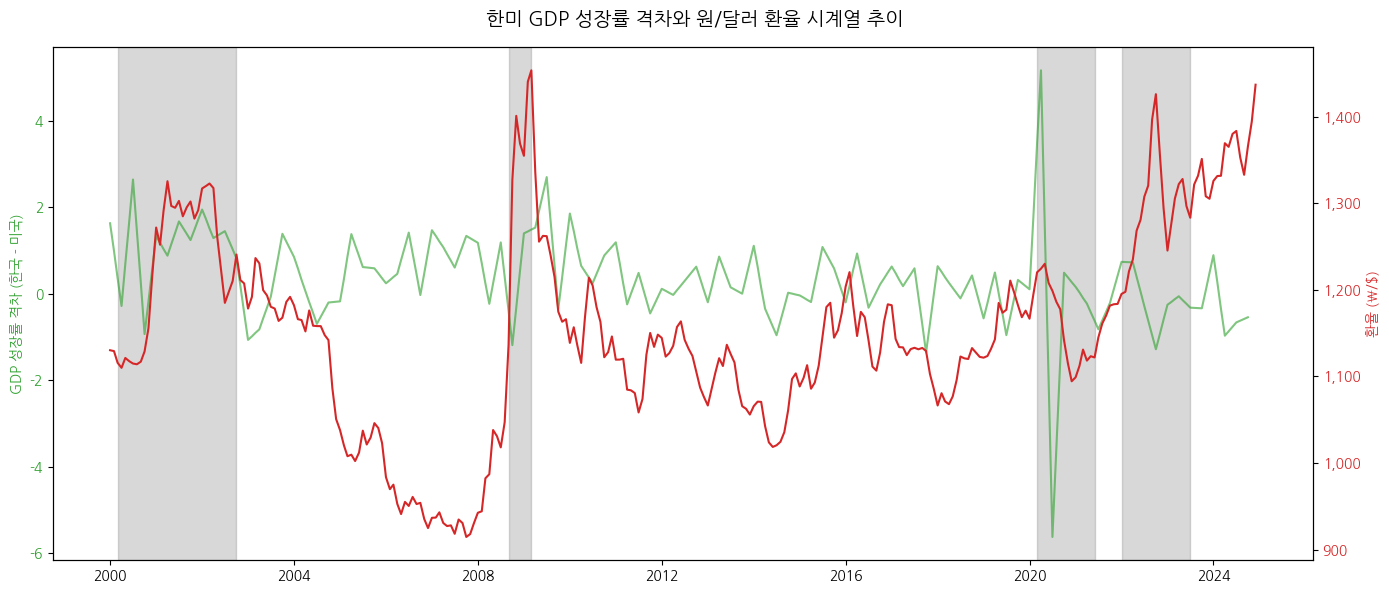

In [232]:
# 폰트 및 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')

# ▶ 분석 및 시각화용 복사본 생성
df_plotgap = df.copy()

# GDP 성장률 격차 계산 (복사본에서만)
df_plotgap["GDP성장률격차"] = df_plotgap["한국 경제성장률"] - df_plotgap["미국 경제성장률"]

# 이상치 기준 설정 (절댓값 2.5% 초과, 복사본에서만)
outlier_threshold = 2.5
df_plotgap["이상치"] = df_plotgap["GDP성장률격차"].abs() > outlier_threshold

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(14, 6))

# ▶ 왼쪽 y축: GDP 성장률 격차 (초록색)
color1 = "tab:green"
ax1.set_ylabel("GDP 성장률 격차 (한국 - 미국)", color=color1)
ax1.plot(df_plotgap["TIME"], df_plotgap["GDP성장률격차"], color=color1, alpha=0.6, label="GDP 성장률 격차")
ax1.tick_params(axis='y', labelcolor=color1)

# ▶ 오른쪽 y축: 환율 (빨간색, 1,000 단위로 표시)
ax2 = ax1.twinx()
color2 = "tab:red"
ax2.set_ylabel("환율 (₩/$)", color=color2)
ax2.plot(df_plotgap["TIME"], df_plotgap["원/달러환율"], color=color2, label="원/달러 환율")
ax2.tick_params(axis='y', labelcolor=color2)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 이벤트 음영 표시 (글자 X)
events = [
    ("2000-03", "2002-10"),  # 닷컴 버블
    ("2008-09", "2009-03"),  # 금융위기
    ("2020-03", "2021-06"),  # 코로나
    ("2022-01", "2023-07"),  # 자이언트 스텝
]

for start, end in events:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    ax1.axvspan(start_date, end_date, color='grey', alpha=0.3)

# 제목 및 정리
fig.suptitle("한미 GDP 성장률 격차와 원/달러 환율 시계열 추이", fontsize=14)
fig.tight_layout()
plt.show()



#### 추론통계

✅  한미 GDP 성장률 격차와 원/달러 환율 산점도

📈 상관계수: -0.076


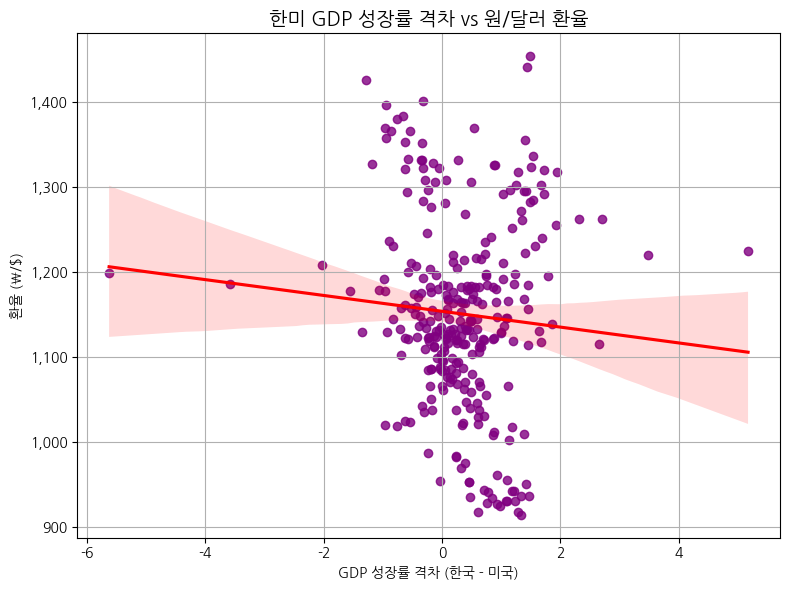

In [233]:
# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


# 유효한 데이터만 필터링
df_gdpgap = df_plotgap[["TIME", "GDP성장률격차", "원/달러환율"]].dropna()

# 상관계수 출력
corr = df_gdpgap["GDP성장률격차"].corr(df_gdpgap["원/달러환율"])
print(f"📈 상관계수: {corr:.3f}")

# 시각화
plt.figure(figsize=(8, 6))
ax = sns.regplot(x="GDP성장률격차", y="원/달러환율", data=df_gdpgap, color="purple", line_kws={"color": "red"})

# y축(환율) 숫자 포맷을 1,000 단위 콤마로 설정
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.title("한미 GDP 성장률 격차 vs 원/달러 환율", fontsize=14)
plt.xlabel("GDP 성장률 격차 (한국 - 미국)")
plt.ylabel("환율 (₩/$)")
plt.grid(True)
plt.tight_layout()
plt.show()



귀무가설 (H₀): 성장률 격차와 환율 간에는 상관관계가 없다. (ρ = 0)

대립가설 (H₁): 한국이 미국보다 성장률이 낮을수록 환율이 상승한다.

In [234]:
# 유효한 데이터만 필터링 (NaN 제거)
df_gdpgap = df_plotgap[["TIME", "GDP성장률격차", "원/달러환율"]].dropna()

# 변수 추출
x = df_gdpgap["GDP성장률격차"]
y = df_gdpgap["원/달러환율"]

# 피어슨 상관계수 및 양측 p값
r, p_two_tailed = stats.pearsonr(x, y)

# 단측검정 (양의 상관관계 가정)
if r > 0:
    p_one_tailed = p_two_tailed / 2
else:
    p_one_tailed = 1 - (p_two_tailed / 2)

print(f"📌 피어슨 상관계수: r = {r:.4f}")
print(f"📌 단측검정 p-value (양의 상관): {p_one_tailed:.4f}")


📌 피어슨 상관계수: r = -0.0758
📌 단측검정 p-value (양의 상관): 0.9040


 😊 결론 😊

r = -0.0758 :매우 약한 음의 상관관계

p = 0.9040 > 0.05 : 귀무가설 기각 못 함

→ 유의미한 상관관계 아님

# 정부 - 이벤트 스터디

In [235]:
import matplotlib.pyplot as plt
import numpy as np
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y-%m-%d', errors='coerce')

selected_columns = ['원/달러환율',
                            '실질GDP',
                            '실질GDP성장률']

# 1. 금융위기 기간
mask_2008 = (df['TIME'] >= '2008-09-01') & (df['TIME'] <= '2009-03-01')
df_2008 = df.loc[mask_2008, selected_columns]

# 2. 최근 데이터 (2022)
mask_2022 = (df['TIME'] >= '2022-01-01') & (df['TIME'] <= '2023-12-01')
df_2022 = df.loc[mask_2022, selected_columns]



# 분석 대상 변수 (원/달러 환율은 기준 변수)
target = '원/달러환율'
features = [col for col in selected_columns if col != target]

# 두 시기 각각의 상관계수 계산
corr_2008 = df_2008[features + [target]].corr()[target].drop(target)
corr_2022 = df_2022[features + [target]].corr()[target].drop(target)

# 정렬 기준 설정 (2008 기준 절댓값 순으로)
sorted_features = corr_2008.abs().sort_values(ascending=False).index.tolist()

# 2008 상관계수를 기준으로 내림차순 정렬
sorted_features = corr_2008.sort_values(ascending=False).index.tolist()
corr_2008 = corr_2008[sorted_features]
corr_2022 = corr_2022[sorted_features]

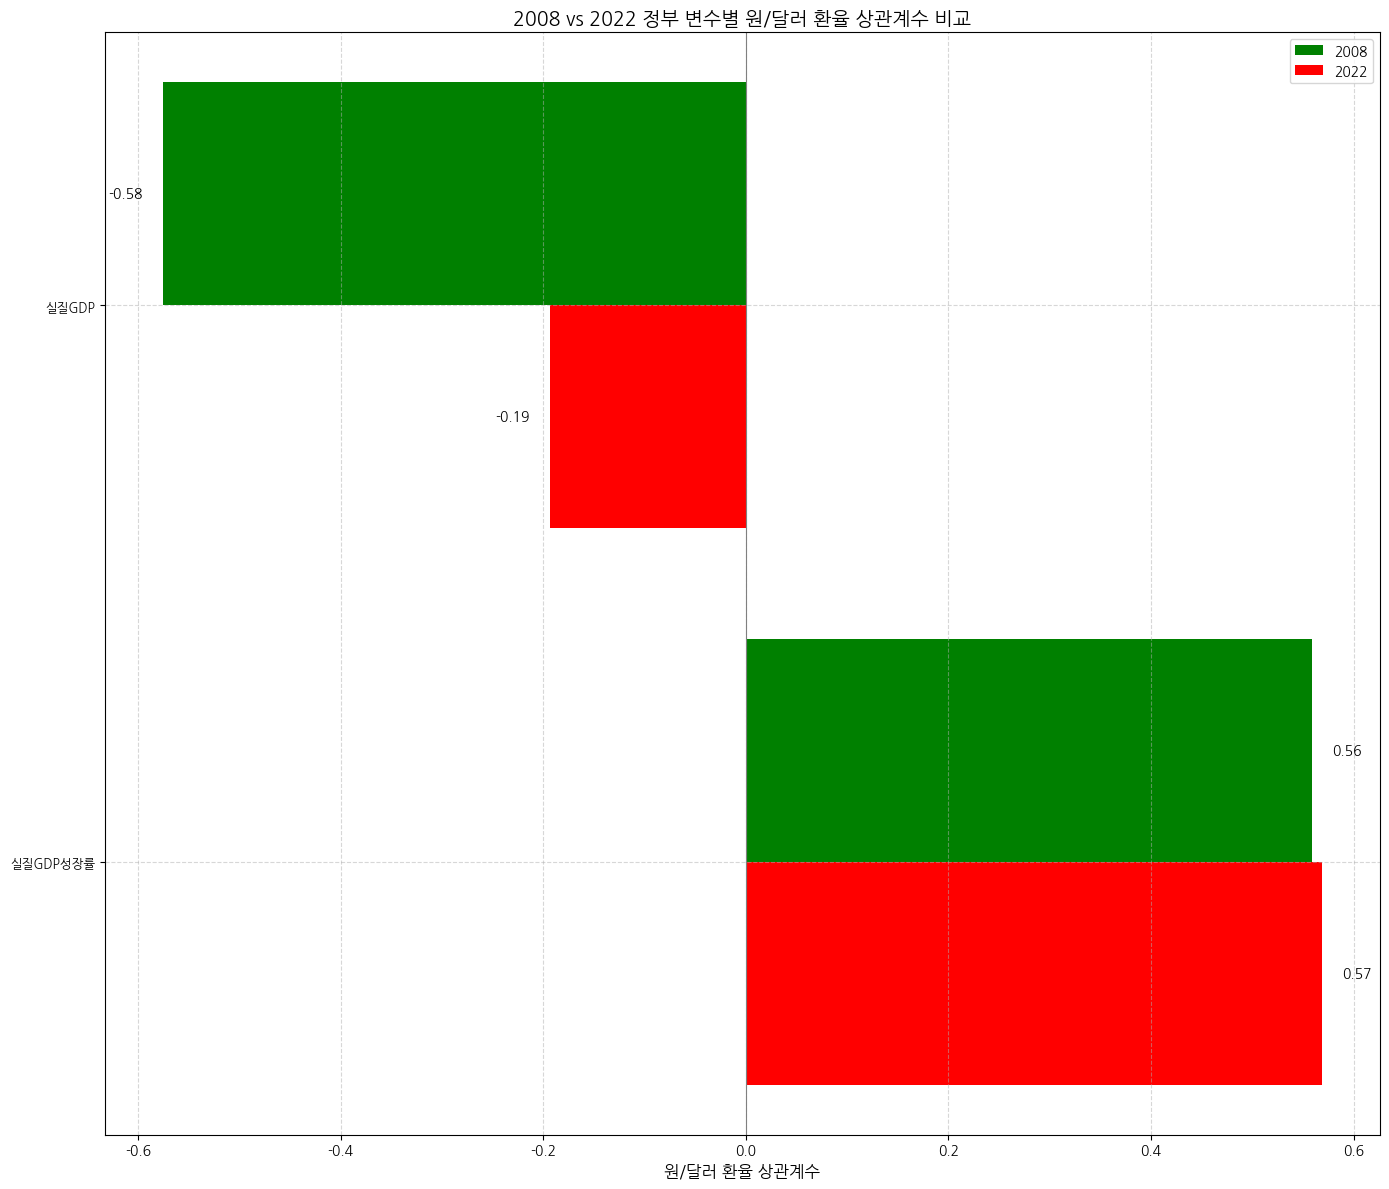

In [236]:
# 시각화
bar_width = 0.4
y_pos = np.arange(len(sorted_features))
plt.figure(figsize=(14, 12))

bars1 = plt.barh(y_pos + bar_width/2, corr_2008, height=bar_width, label='2008', color='green')
bars2 = plt.barh(y_pos - bar_width/2, corr_2022, height=bar_width, label='2022', color='red')

plt.yticks(y_pos, sorted_features, fontsize=9)
plt.xlabel('원/달러 환율 상관계수', fontsize=12)
plt.title('2008 vs 2022 정부 변수별 원/달러 환율 상관계수 비교', fontsize=14)
plt.axvline(0, color='gray', linewidth=0.8)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 상관계수 수치 표시
for bar in bars1:
    width = bar.get_width()
    plt.text(width + 0.02 * np.sign(width), bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', ha='left' if width > 0 else 'right', fontsize=10)

for bar in bars2:
    width = bar.get_width()
    plt.text(width + 0.02 * np.sign(width), bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', ha='left' if width > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

# 머신러닝

## 랜덤포레스트 - 전체변수

In [239]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === 시드 고정 ===
def set_full_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_full_seed(50)

# === 데이터 준비 ===
features = ['경제 심리 지수', '한국 기준 금리', '미국 기준 금리', '한국 외환 보유액',
            '한국 실업률', '미국 실업률', '한국 주가지수', '미국 주가지수', 'WTI 유가', '두바이 유가',
            'Brent 유가', '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격',
            '알루미늄 가격', '니켈 가격', '아연 가격', '금 가격', '대두 가격', '외국인 투자 금액',
            '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격',
            '한국 경상수지', '한국 인플레이션율', '인플레이션 격차',
            'M2', '실질GDP성장률', 'vix']

df_filled = df.ffill().bfill()
df_filled['원_달러환율_t_plus_1'] = df_filled['원/달러환율'].shift(-1)
df_filled = df_filled.iloc[:-1]

X = df_filled[features]
y = df_filled['원_달러환율_t_plus_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

# 공통 RandomForest 파라미터
rf_params = dict(n_estimators=200, max_depth=5, min_samples_leaf=10, random_state=50)

results = []

# === 1️⃣ RandomForest Feature Importance ===
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_top_idx = np.argsort(rf_importances)[-10:]
X_train_rf = X_train.iloc[:, rf_top_idx]
X_test_rf = X_test.iloc[:, rf_top_idx]

rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train_rf, y_train)
y_test_pred = rf_model.predict(X_test_rf)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

results.append({'Method': 'RF Feature Importance', 'RMSE': test_rmse, 'MAE': test_mae, 'R2': test_r2})

# === 2️⃣ Permutation Importance ===
perm_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=50, n_jobs=-1)
perm_importances = perm_result.importances_mean
perm_top_idx = np.argsort(perm_importances)[-10:]
X_train_perm = X_train.iloc[:, perm_top_idx]
X_test_perm = X_test.iloc[:, perm_top_idx]

rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train_perm, y_train)
y_test_pred = rf_model.predict(X_test_perm)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

results.append({'Method': 'Permutation Importance', 'RMSE': test_rmse, 'MAE': test_mae, 'R2': test_r2})

# === 3️⃣ LASSO Selection ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.01, random_state=50)
lasso.fit(X_train_scaled, y_train)
lasso_idx = np.where(lasso.coef_ != 0)[0]
if len(lasso_idx) == 0:
    print("⚠️ LASSO에서 선택된 피처가 없습니다. alpha 값을 줄여보세요.")
else:
    X_train_lasso = X_train.iloc[:, lasso_idx]
    X_test_lasso = X_test.iloc[:, lasso_idx]

    rf_model = RandomForestRegressor(**rf_params)
    rf_model.fit(X_train_lasso, y_train)
    y_test_pred = rf_model.predict(X_test_lasso)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append({'Method': 'LASSO Selection', 'RMSE': test_rmse, 'MAE': test_mae, 'R2': test_r2})

# === 최종 결과 출력 ===
results_df = pd.DataFrame(results)
print("\n✅ Final Comparison Results:")
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.470e+04, tolerance: 2.513e+02
  model = cd_fast.enet_coordinate_descent(



✅ Final Comparison Results:
                   Method        RMSE         MAE        R2
0   RF Feature Importance  177.992332  147.203491 -2.673484
1  Permutation Importance  159.932331  134.749965 -1.965843
2         LASSO Selection  183.425302  151.380231 -2.901163


## 랜덤포레스트 - 유의미한 변수

In [240]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === 시드 고정 ===
def set_full_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_full_seed(50)

# === 데이터 준비 ===
# 변수 정의
features = ['경제 심리 지수', '한국 외환 보유액', 'vix', 'WTI 유가', '한국 실업률', '두바이 유가',
                        'Brent 유가', '천연가스 가격', '유연탄 가격', '미국 주가지수',
                        '한국 인플레이션율', '인플레이션 격차', '실질GDP성장률','M2',
                        '금 가격', '구리 가격', '아연 가격', '알루미늄 가격', '니켈 가격',
                        '외국인 투자 금액']
# ✅ 2️⃣ 결측치 처리

df_filled = df.ffill().bfill()
df_filled['원_달러환율_t_plus_1'] = df_filled['원/달러환율'].shift(-1)
df_filled = df_filled.iloc[:-1]

X = df_filled[features]
y = df_filled['원_달러환율_t_plus_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

# 공통 RandomForest 파라미터
rf_params = dict(n_estimators=200, max_depth=5, min_samples_leaf=10, random_state=50)

results = []

# === 1️⃣ RandomForest Feature Importance ===
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_top_idx = np.argsort(rf_importances)[-10:]
X_train_rf = X_train.iloc[:, rf_top_idx]
X_test_rf = X_test.iloc[:, rf_top_idx]

rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train_rf, y_train)
y_test_pred = rf_model.predict(X_test_rf)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

results.append({'Method': 'RF Feature Importance', 'RMSE': test_rmse, 'MAE': test_mae, 'R2': test_r2})

# === 2️⃣ Permutation Importance ===
perm_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=50, n_jobs=-1)
perm_importances = perm_result.importances_mean
perm_top_idx = np.argsort(perm_importances)[-10:]
X_train_perm = X_train.iloc[:, perm_top_idx]
X_test_perm = X_test.iloc[:, perm_top_idx]

rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train_perm, y_train)
y_test_pred = rf_model.predict(X_test_perm)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

results.append({'Method': 'Permutation Importance', 'RMSE': test_rmse, 'MAE': test_mae, 'R2': test_r2})

# === 3️⃣ LASSO Selection ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.01, random_state=50)
lasso.fit(X_train_scaled, y_train)
lasso_idx = np.where(lasso.coef_ != 0)[0]
if len(lasso_idx) == 0:
    print("⚠️ LASSO에서 선택된 피처가 없습니다. alpha 값을 줄여보세요.")
else:
    X_train_lasso = X_train.iloc[:, lasso_idx]
    X_test_lasso = X_test.iloc[:, lasso_idx]

    rf_model = RandomForestRegressor(**rf_params)
    rf_model.fit(X_train_lasso, y_train)
    y_test_pred = rf_model.predict(X_test_lasso)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append({'Method': 'LASSO Selection', 'RMSE': test_rmse, 'MAE': test_mae, 'R2': test_r2})

# === 최종 결과 출력 ===
results_df = pd.DataFrame(results)
print("\n✅ Final Comparison Results:")
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+05, tolerance: 2.513e+02
  model = cd_fast.enet_coordinate_descent(



✅ Final Comparison Results:
                   Method        RMSE         MAE        R2
0   RF Feature Importance  174.549075  143.856496 -2.532732
1  Permutation Importance  159.287052  134.538623 -1.941959
2         LASSO Selection  179.944825  148.387953 -2.754519
